# Predicting Diabetis 

In [86]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold

seed = 7
numpy.random.seed(seed)


##### Loding Dataset

In [6]:
dataset = pd.read_csv("/home/hasan/DATA SET/pima-indians-diabetes-database/diabetes.csv", delimiter=",")


In [8]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### Split Dataset

In [9]:
X = dataset.iloc[:,0:8]
Y = dataset.iloc[:,8]

##### Model

In [17]:
model = Sequential()
model.add(Dense(50, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(25, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))


In [19]:
#summary of the model
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 50)                450       
_________________________________________________________________
dense_20 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 26        
Total params: 1,751
Trainable params: 1,751
Non-trainable params: 0
_________________________________________________________________


In [20]:
#compile the Model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

##### Fit the Model

In [21]:
model.fit(X, Y, nb_epoch=150, batch_size=10)

/home/hasan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/150
768/768 [==============================] - 1s 1ms/step - loss: 0.6678 - accuracy: 0.6497
Epoch 2/150
768/768 [==============================] - 0s 162us/step - loss: 0.6519 - accuracy: 0.6432
Epoch 3/150
768/768 [==============================] - 0s 157us/step - loss: 0.6278 - accuracy: 0.6602
Epoch 4/150
768/768 [==============================] - 0s 166us/step - loss: 0.6146 - accuracy: 0.6745
Epoch 5/150
768/768 [==============================] - 0s 166us/step - loss: 0.6155 - accuracy: 0.6732
Epoch 6/150
768/768 [==============================] - 0s 156us/step - loss: 0.5977 - accuracy: 0.7018
Epoch 7/150
768/768 [==============================] - 0s 156us/step - loss: 0.6074 - accuracy: 0.6862
Epoch 8/150
768/768 [==============================] - 0s 161us/step - loss: 0.5898 - accuracy: 0.6836
Epoch 9/150
768/768 [==============================] - 0s 158us/step - loss: 0.5954 - accuracy: 0.7044
Epoch 10/150
768/768 [==============================] - 0s 173us/step - los

##### Evaluate the Model

In [22]:
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

768/768 [==============================] - 0s 48us/step
accuracy: 81.64%


# Same Project Using Use a Manual Verification Dataset

##### Reading Dataset

In [87]:
dataset = pd.read_csv("/home/hasan/DATA SET/pima-indians-diabetes-database/diabetes.csv", delimiter=",")


In [88]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### Feature and label data

In [89]:
X = dataset.iloc[:,0:8]
Y = dataset.iloc[:,8]

##### Split into train and test

In [90]:
Xtrain, xtest, Ytrain, ytest = train_test_split(X, Y, test_size=0.33, random_state=seed)

##### Model

In [91]:
model = Sequential()
model.add(Dense(50, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(.5))
model.add(Dense(25, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(.2))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))


In [92]:
#summary of the model
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 50)                450       
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 25)                1275      
_________________________________________________________________
dropout_2 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 26        
Total params: 1,751
Trainable params: 1,751
Non-trainable params: 0
_________________________________________________________________


In [93]:
#compile the Model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

##### Fit Model

In [94]:
model_fit = model.fit(Xtrain, Ytrain, nb_epoch=150, batch_size=10, validation_data=(xtest,ytest))

/home/hasan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 514 samples, validate on 254 samples
Epoch 1/150
514/514 [==============================] - 0s 723us/step - loss: 0.6782 - accuracy: 0.6148 - val_loss: 0.6775 - val_accuracy: 0.6378
Epoch 2/150
514/514 [==============================] - 0s 245us/step - loss: 0.6600 - accuracy: 0.6595 - val_loss: 0.6603 - val_accuracy: 0.6378
Epoch 3/150
514/514 [==============================] - 0s 254us/step - loss: 0.6549 - accuracy: 0.6420 - val_loss: 0.6455 - val_accuracy: 0.6417
Epoch 4/150
514/514 [==============================] - 0s 236us/step - loss: 0.6475 - accuracy: 0.6751 - val_loss: 0.6338 - val_accuracy: 0.6417
Epoch 5/150
514/514 [==============================] - 0s 232us/step - loss: 0.6380 - accuracy: 0.6654 - val_loss: 0.6293 - val_accuracy: 0.6654
Epoch 6/150
514/514 [==============================] - 0s 236us/step - loss: 0.6381 - accuracy: 0.6537 - val_loss: 0.6225 - val_accuracy: 0.6457
Epoch 7/150
514/514 [==============================] - 0s 244us/step - loss: 0.6274 

##### Evaluate model

In [95]:
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

768/768 [==============================] - 0s 27us/step
accuracy: 69.27%


##### Accuracy and Loss Curve

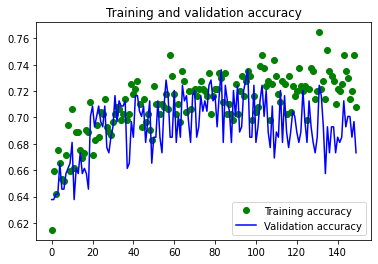

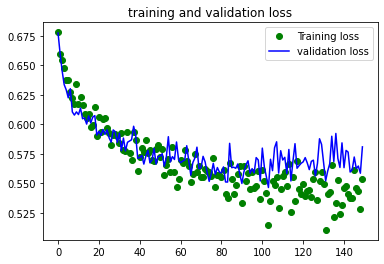

In [96]:
accuracy = model_fit.history['accuracy']
val_accuracy = model_fit.history['val_accuracy']

loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']

epochs = range(len(val_accuracy))
plt.plot(epochs, accuracy, 'go', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

# Same Project Using k-Fold Cross-Validation

##### Reading Dataset

In [112]:
dataset = numpy.loadtxt("/home/hasan/DATA SET/diabetes.csv", delimiter=",")


##### Split Dataset

In [113]:
X = dataset[:,0:8]
Y = dataset[:,8]


##### K-Fold Cross Validation

In [114]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)


In [115]:
cvscores = []

for train, test in kfold.split(X,Y):
    model = Sequential()
    model.add(Dense(50, input_dim=8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(25, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    #model compile
    model.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    
    #model fit
    model.fit(X[train], Y[train], epochs=150, batch_size=10, verbose=0)
    
    # evaluate the model
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

accuracy: 77.92%
accuracy: 72.73%
accuracy: 75.32%
accuracy: 79.22%
accuracy: 79.22%
accuracy: 76.62%
accuracy: 76.62%
accuracy: 66.23%
accuracy: 71.05%
accuracy: 76.32%
75.13% (+/- 3.86%)


Note: Delete the columns name if program doesn't run

# Same Model Evaluating Models with Cross-Validation

In [118]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

##### Reading Dataset

In [120]:
dataset = pd.read_csv("/home/hasan/DATA SET/pima-indians-diabetes-database/diabetes.csv", delimiter=",")


In [121]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### Feature and Label Data

In [122]:
X = dataset.iloc[:,0:8]
Y = dataset.iloc[:,8]

##### Model

In [123]:
def create_model():
    model = Sequential()
    model.add(Dense(50, input_dim=8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(25, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model



In [124]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=10, verbose=0)

# evaluate using 10-fold cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

#cross validation score
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.7278024613857269


# Same Model Using Grid Search Deep Learning Model Parameters

In [125]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

##### Reading Dataset

In [129]:
dataset = pd.read_csv("/home/hasan/DATA SET/pima-indians-diabetes-database/diabetes.csv", delimiter=",")


In [130]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### Feature and Label Data

In [131]:
X = dataset.iloc[:,0:8]
Y = dataset.iloc[:,8]

##### Model

In [137]:
def create_model(optimizer='rmsprop', init='glorot_uniform'):
    model = Sequential()
    model.add(Dense(50, input_dim=8, init='uniform', activation='relu'))
    model.add(Dense(25, init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform', activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [139]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# grid search epochs, batch size and optimizer
optimizers = ['rmsprop', 'adam']
init = ['glorot_uniform', 'normal', 'uniform']
epochs = [50, 100, 150]
batches = [5, 10, 20]
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=init)

#grid search CV
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X, Y)


/home/hasan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, input_dim=8, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/hasan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/home/hasan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  """


In [141]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.753906 using {'batch_size': 10, 'epochs': 150, 'init': 'uniform', 'optimizer': 'rmsprop'}
0.722656 (0.016877) with: {'batch_size': 5, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.721354 (0.010253) with: {'batch_size': 5, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.717448 (0.022402) with: {'batch_size': 5, 'epochs': 50, 'init': 'normal', 'optimizer': 'rmsprop'}
0.729167 (0.027126) with: {'batch_size': 5, 'epochs': 50, 'init': 'normal', 'optimizer': 'adam'}
0.712240 (0.017566) with: {'batch_size': 5, 'epochs': 50, 'init': 'uniform', 'optimizer': 'rmsprop'}
0.726562 (0.027805) with: {'batch_size': 5, 'epochs': 50, 'init': 'uniform', 'optimizer': 'adam'}
0.742188 (0.016877) with: {'batch_size': 5, 'epochs': 100, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.714844 (0.014616) with: {'batch_size': 5, 'epochs': 100, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.721354 (0.007366) with: {'batch_size': 5, 'epochs': 100, 'init': 'normal', '